In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

def sign(x):
    res = [1 if temp>=0 else -1 for temp in x[0]]
    return np.array(res).reshape(x.shape)

class Perceptron():
    def __init__(self, alpha=0.01, iteration=1000):
        """
        alpha     学习步长
        w         权重向量
        iteration 最大迭代次数
        """
        self.alpha = alpha
        self.iteration = iteration
    
    def fit(self, X, y):
        data_num, fea_num = X.shape
        ones = np.ones(data_num).reshape((1,-1))
        X_ = np.vstack((ones, X.T))
        y = y.reshape((1,-1))
        self.w = np.random.rand(fea_num+1,1).reshape((-1,1))
        self.error = []
        i = 0
        deng = [1]
        while i<self.iteration and sum(deng):
            deng = sign(np.dot(self.w.T, X_))!=y
            deng = deng[0]
            self.error.append(-np.sum(deng*y*np.dot(self.w.T, X_)))
            self.w = self.w + self.alpha*np.dot(X_, (y*deng).T)
            i += 1
    
    def predict(self, X):
        X_ = np.vstack((np.ones(X.shape[0]).reshape((1,-1)), X.T))
        return sign(np.dot(self.w.T, X_))

In [2]:
X = np.array([[5.1, 3.5],[4.9, 3. ],[4.7, 3.2],[4.6, 3.1],[5. , 3.6],[5.4, 3.9],[4.6, 3.4],[5. , 3.4],[4.4, 2.9],[4.9, 3.1],[5.8, 2.7],[7.1, 3. ],[6.3, 2.9],[6.5, 3. ],[7.6, 3. ],[4.9, 2.5],[7.3, 2.9],[6.7, 2.5],[7.2, 3.6],[6.5, 3.2]])
y = np.hstack((np.ones(10),-1*np.ones(10)))

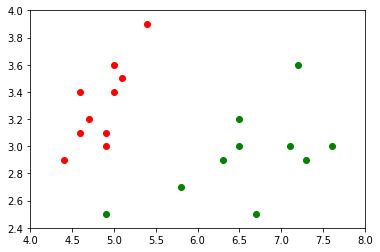

In [3]:
# 演示
plt.xlim(4,8)
plt.ylim(2.4,4)
plt.scatter(X[y==1,0], X[y==1,1], color='red')
plt.scatter(X[y==-1,0], X[y==-1,1], color='green')

In [4]:
# 训练
clf=Perceptron()
clf.fit(X,y)
line1 = X[:,0]
line2 = -(clf.w[0]+clf.w[1]*line1)/clf.w[2]

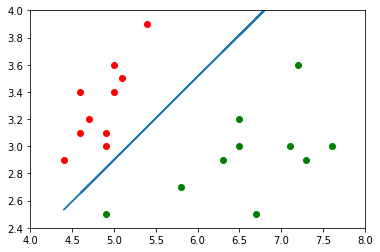

In [5]:
plt.xlim(4,8)
plt.ylim(2.4,4)
plt.scatter(X[y==1,0],X[y==1,1],color='red')
plt.scatter(X[y==-1,0],X[y==-1,1],color='green')
plt.plot(line1,line2)

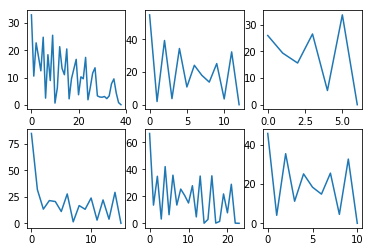

In [6]:
# 损失函数走势
for i in range(6):
    clf=Perceptron()
    clf.fit(X,y)
    plt.subplot(2,3,i+1)
    plt.plot(range(len(clf.error)), clf.error)